In [13]:
library(ggplot2)
library(RColorBrewer)
library(cowplot)
library(gridExtra)
library(ggsci)
library(scales)
library(viridis)
library(tidyverse)

In [17]:
# projdir <- '/u/project/cluo/terencew/demux_benchmark/adelus_2023/'
projdir <- '/u/home/t/terencew/project-cluo/igvf/pilot/multiome'
cr_stats <- read.table(paste0(projdir, '/csv/final_figures/figure4/cr_stats.csv'), sep='\t', header=1)

In [18]:
head(cr_stats)

,X,gex_raw_reads,atac_raw_reads,atac_fragments,gex_umis_count,sample
,<chr>,<int>,<int>,<int>,<int>,<chr>
1,AAACAGCCAACTAGCC-1_ctrl6h,52194,138943,63427,16241,Aorta Run 1
2,AAACAGCCACACAATT-1_ctrl6h,48186,82634,37571,14574,Aorta Run 1
3,AAACAGCCACTCGCTC-1_ctrl6h,60302,130625,58956,18320,Aorta Run 1
4,AAACCAACAGAACCGA-1_ctrl6h,24810,65071,31480,7539,Aorta Run 1
5,AAACCGAAGCTATGAC-1_ctrl6h,30863,66325,31168,9142,Aorta Run 1
6,AAACCGCGTCAACAAT-1_ctrl6h,62127,157995,72738,18908,Aorta Run 1


In [19]:
axis_size = 20
title_size = 30

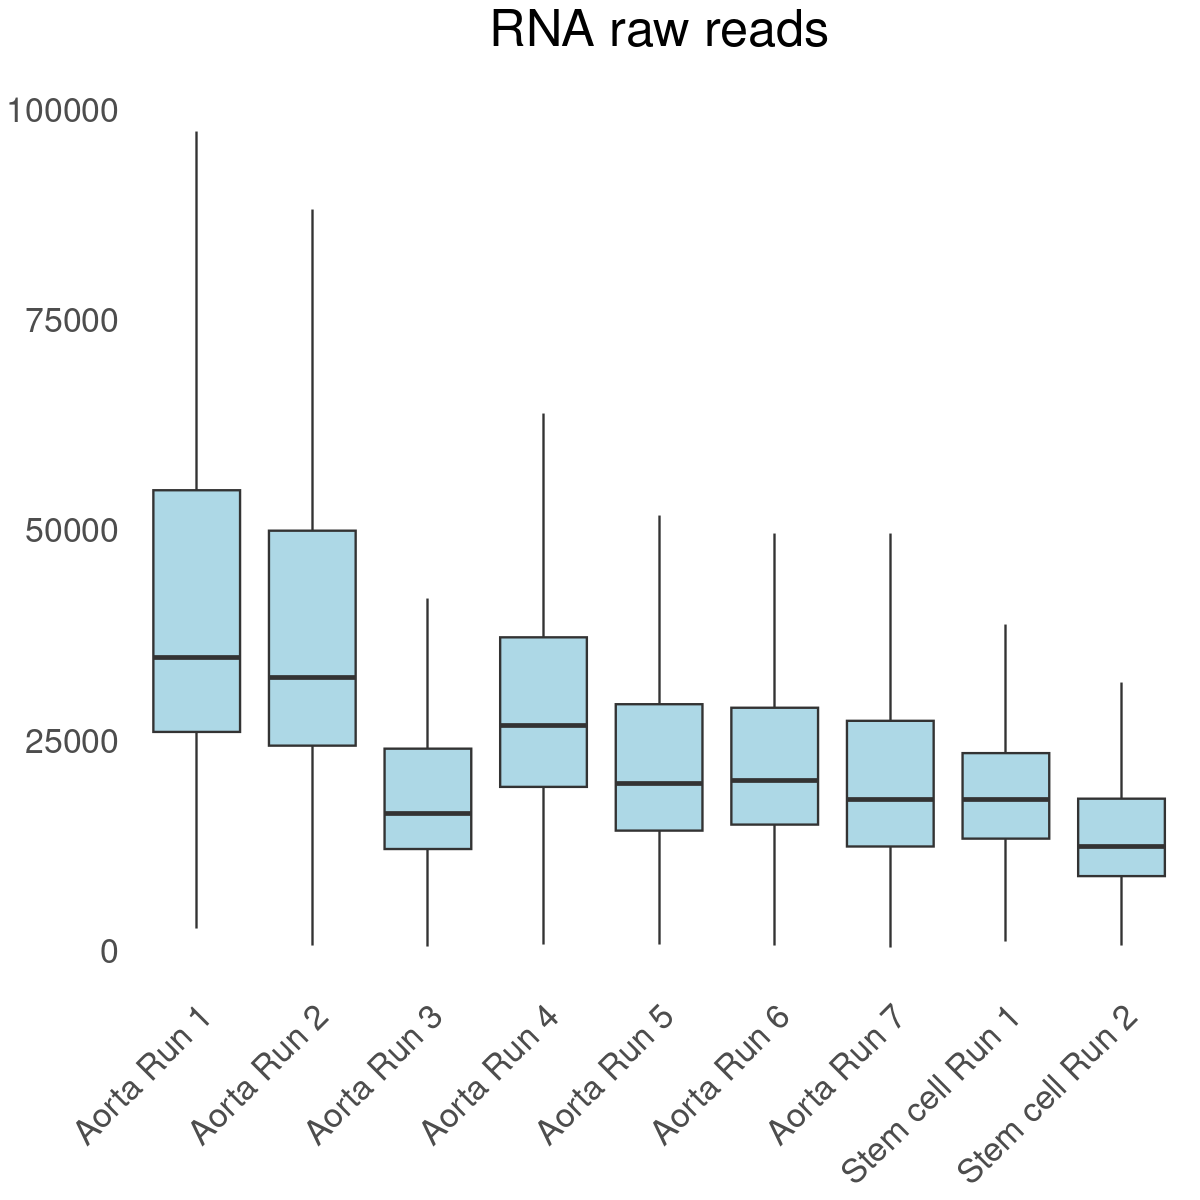

In [48]:
p1 <- ggplot(cr_stats, aes(x = sample, y = gex_raw_reads)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, outlier.colour = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = axis_size, angle = 45, hjust = 1),
        axis.text.y = element_text(size = axis_size, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
  coord_cartesian(ylim = c(0, 100000)) +  # Set the desired y-axis limits
    ggtitle('RNA raw reads')
p1

In [49]:
p2 <- ggplot(cr_stats, aes(x = sample, y = atac_raw_reads)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, outlier.colour = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = axis_size, angle = 45, hjust = 1),
        axis.text.y = element_text(size = axis_size, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
  coord_cartesian(ylim = c(0, 200000)) +  # Set the desired y-axis limits
    ggtitle('ATAC raw reads')

In [50]:
p3 <- ggplot(cr_stats, aes(x = sample, y = gex_umis_count)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, outlier.colour = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = axis_size, angle = 45, hjust = 1),
        axis.text.y = element_text(size = axis_size, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
  coord_cartesian(ylim = c(0, 50000)) +  # Set the desired y-axis limits
  ggtitle('RNA UMIs')

In [51]:
p4 <- ggplot(cr_stats, aes(x = sample, y = atac_fragments)) +
  geom_boxplot(fill = "lightblue", outlier.shape = NA, outlier.colour = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(size = axis_size, angle = 45, hjust = 1),
        axis.text.y = element_text(size = axis_size, hjust = 1),
        axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid = element_blank(),
        plot.title = element_text(size = title_size, hjust = 0.5)) +
  coord_cartesian(ylim = c(0, 100000)) +  # Set the desired y-axis limits
    ggtitle('ATAC Fragments')

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


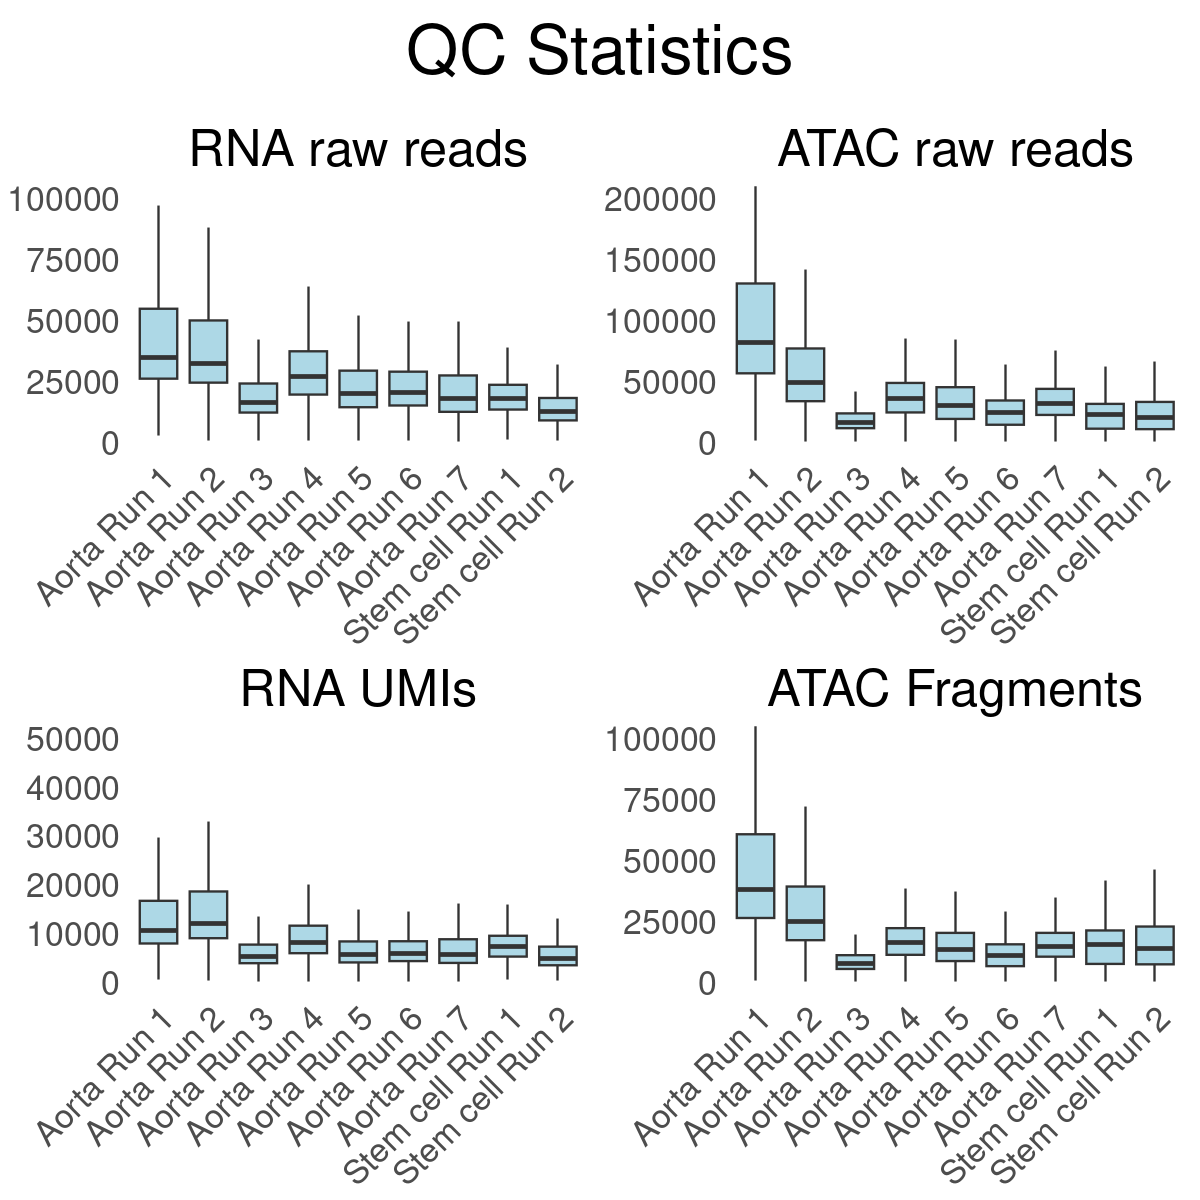

In [52]:
prow <- plot_grid(p1, p2, p3, p4,
  align = 'vh',
  labels = c("", ""),
  nrow = 2
)
combined_plot <- plot_grid(prow, rel_widths = c(200, 1), width=200)
final_plot <- ggdraw() +
  draw_text("QC Statistics", x = 0.5, y = 0.98, hjust = 0.5, vjust = 1,
            size = 40, color = "black", family = "arial") +
  draw_plot(combined_plot, x = 0, y = 0, width = 1, height = 0.9)

options(repr.plot.width=10, repr.plot.height=10)
print(final_plot)